<a href="https://colab.research.google.com/github/MaxSMCON/Group07/blob/main/Convolution_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021-11-30

# Import stuff

In [ ]:
from PIL import Image
import numpy as np
from scipy import ndimage
from scipy.signal import convolve2d, convolve
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, SeparableConv2D

def array_to_image(a):
  return Image.fromarray(np.uint8(a))

# Download data

In [ ]:
!gdown https://drive.google.com/uc?id=1hZtACYS5OsMAYtr2rBKkIWFx9uKam_6B -O doge.jpg

Downloading...
From: https://drive.google.com/uc?id=1hZtACYS5OsMAYtr2rBKkIWFx9uKam_6B
To: /content/doge.jpg
100% 58.8k/58.8k [00:00<00:00, 53.3MB/s]


(480, 480, 3)


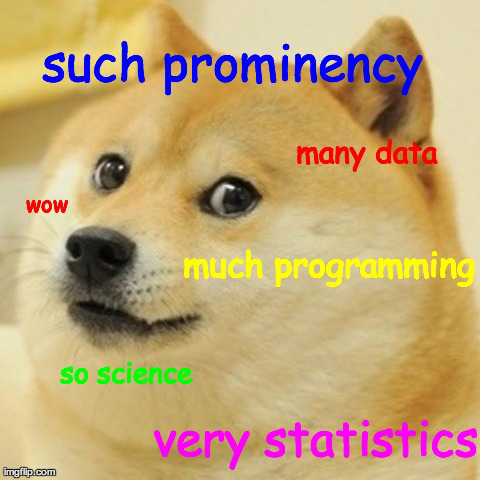

In [ ]:
img = Image.open("doge.jpg")
img_array = np.asarray(img, dtype="uint8")
print(img_array.shape)
img

# 2D convolution



<img src="https://miro.medium.com/max/390/1*Eai425FYQQSNOaahTXqtgg.gif"/>

Each value in result is $C_{i}=\sum _{j}I_{i+k-j}W_{j}$, where $W$ is the weights kernel, $j$ is the N-D spatial index over, $I$ is the input and $k$ is the coordinate of the center of $W$, specified by origin in the input parameters.

## Single-channel

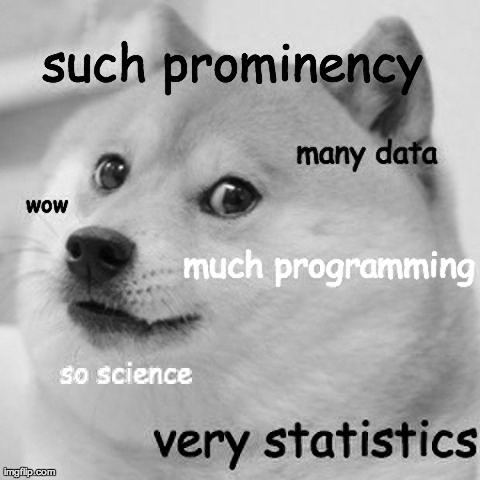

In [ ]:
array_to_image(img_array[:,:,1]) #green channel

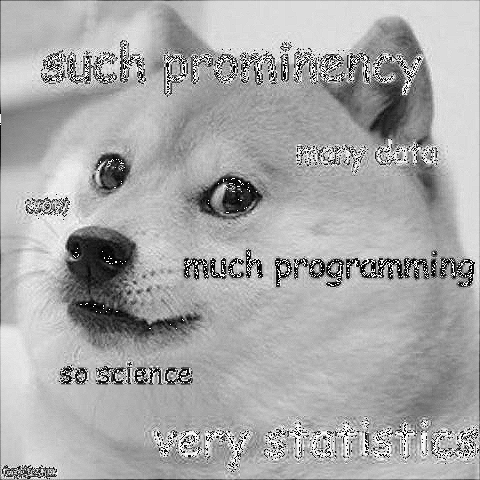

In [ ]:
kernel = np.array([ #sharpen
  [0,-1,0],
  [-1,5,-1],
  [0,-1,0],
])
# kernel = np.array([ #edge detection
#   [0,-1,0],
#   [-1,4,-1],
#   [0,-1,0],
# ])
# kernel = np.array([ #box blur
#   [1,1,1],
#   [1,1,1],
#   [1,1,1],
# ])/9

img_array_convolved = convolve(img_array[:,:,1], kernel, mode='same')
array_to_image(img_array_convolved)

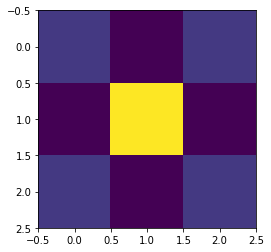

In [ ]:
plt.imshow(kernel);

## Multi-channel (depthwise spatial convolution)

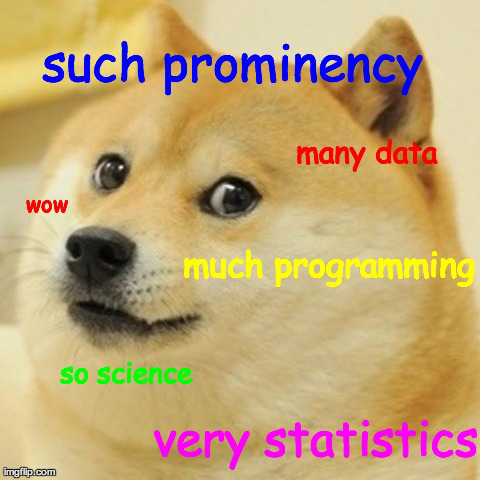

In [ ]:
array_to_image(img_array)

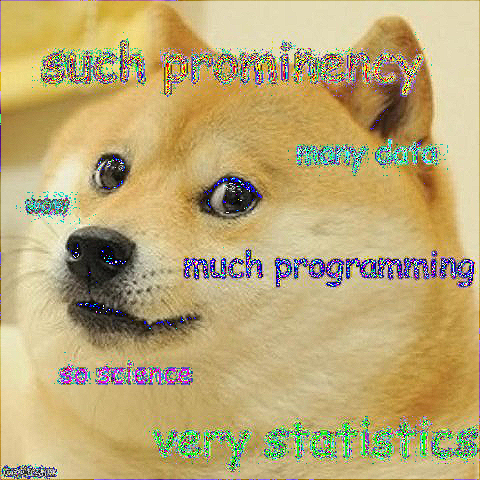

In [ ]:
kernel = np.array([ #sharpen
  [0,-1,0],
  [-1,5,-1],
  [0,-1,0],
])
# kernel = np.array([ #edge detection
#   [0,-1,0],
#   [-1,4,-1],
#   [0,-1,0],
# ])
# kernel = np.array([ #box blur
#   [1,1,1],
#   [1,1,1],
#   [1,1,1],
# ])/9
img_array_convolved = np.stack([convolve(img_array[:,:,channel], kernel, mode='same') for channel in range(img_array.shape[2])], axis=2)
array_to_image(img_array_convolved)

# References#

https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

https://eli.thegreenplace.net/2018/depthwise-separable-convolutions-for-machine-learning/

https://en.wikipedia.org/wiki/Kernel_(image_processing)